In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

In [2]:
file = pd.ExcelFile('Toy_Dataset.xlsx')

In [3]:
data = pd.read_excel(file,'Toy_Dataset')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100865 entries, 0 to 100864
Data columns (total 18 columns):
index                  100865 non-null int64
user_id                91865 non-null float64
gender                 100863 non-null object
age                    91863 non-null float64
start_bmi              90394 non-null float64
activity_factor        100858 non-null float64
OS                     100865 non-null object
connected_pedometer    21352 non-null object
hypothyroid            100865 non-null int64
diabetes               100865 non-null int64
pcos                   100865 non-null int64
physical               100865 non-null int64
hypertension           100865 non-null int64
high_blood_pressure    100865 non-null int64
cholesterol            100865 non-null int64
medical_conditions     100865 non-null int64
devicebrand            100865 non-null object
paid                   100865 non-null int64
dtypes: float64(4), int64(10), object(4)
memory usage: 13.9+ MB


In [5]:
data.describe()[['age','start_bmi','activity_factor','paid']]

,age,start_bmi,activity_factor,paid
count,91863.000000,90394.000000,100858.000000,100865.000000
mean,83.169263,33.524202,1.374217,0.010321
std,30.235619,4.969434,0.172002,0.101066
min,14.000000,7.400000,1.200000,0.000000
25%,58.000000,30.000000,1.200000,0.000000
50%,83.000000,33.100000,1.375000,0.000000
75%,108.000000,36.300000,1.550000,0.000000
max,186.000000,99.800000,1.725000,1.000000


In [6]:
data['connected_pedometer'] = data['connected_pedometer'].replace(r'\s+', np.nan, regex=True)
data['connected_pedometer'] = data['connected_pedometer'].fillna(0)

In [7]:
data.drop(['user_id','index'], axis=1, inplace= True)

In [8]:
missing_df = data.isnull().sum(axis=0).reset_index()
missing_df.columns = ['column_name', 'missing_count']
missing_df = missing_df.loc[missing_df['missing_count']>0]
missing_df = missing_df.sort_values(by='missing_count')

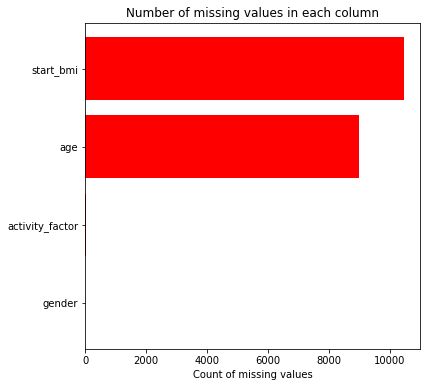

In [74]:
ind = np.arange(missing_df.shape[0])
fig, ax = plt.subplots(figsize=(6,6))
rects = ax.barh(ind, missing_df.missing_count.values, color='red')
ax.set_yticks(ind)
ax.set_yticklabels(missing_df.column_name.values, rotation='horizontal')
ax.set_xlabel("Count of missing values")
ax.set_title("Number of missing values in each column")
plt.show()

In [75]:
data.dropna(inplace=True)

In [76]:
paid_user=data.loc[data['paid'] == 1]
non_paid_user=data.loc[data['paid'] == 0]

In [77]:
paid_user.head()

,gender,age,start_bmi,activity_factor,OS,connected_pedometer,hypothyroid,diabetes,pcos,physical,hypertension,high_blood_pressure,cholesterol,medical_conditions,devicebrand,paid
151,male,56.0,33.0,1.550,android,0,0,0,0,0,0,0,0,0,Xiaomi,1
417,male,80.0,30.2,1.200,android,google_fit,0,0,0,0,0,0,0,0,Xiaomi,1
455,male,103.0,36.4,1.375,android,0,0,1,0,0,0,0,1,1,vivo,1
468,female,44.0,31.1,1.375,android,0,0,0,0,0,0,0,0,0,Xiaomi,1
614,male,107.0,34.1,1.550,android,0,0,0,0,0,0,0,0,0,Xiaomi,1


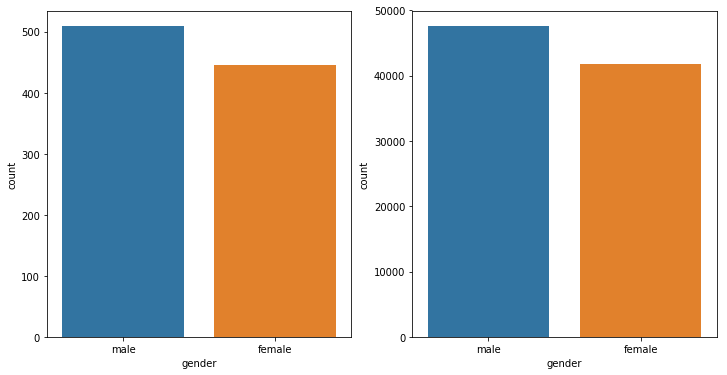

In [78]:
fig, ax =plt.subplots(1,2)
fig.set_size_inches(12, 6)
sns.countplot(x='gender',data=paid_user, ax=ax[0],)
sns.countplot(x='gender',data=non_paid_user, ax=ax[1])


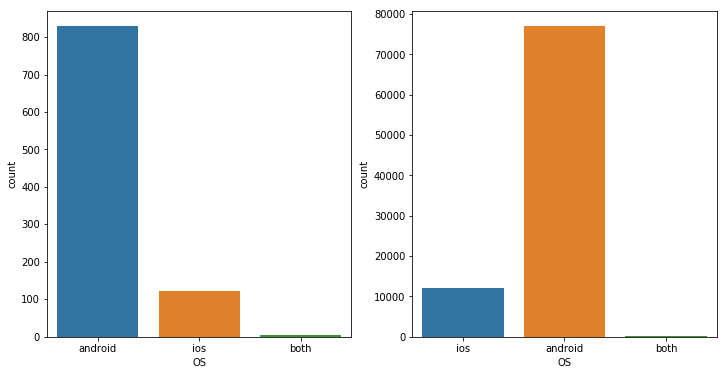

In [79]:
fig, ax=plt.subplots(1,2)
fig.set_size_inches(12,6)
sns.countplot(x='OS',data=paid_user, ax=ax[0],)
sns.countplot(x='OS',data=non_paid_user, ax=ax[1])

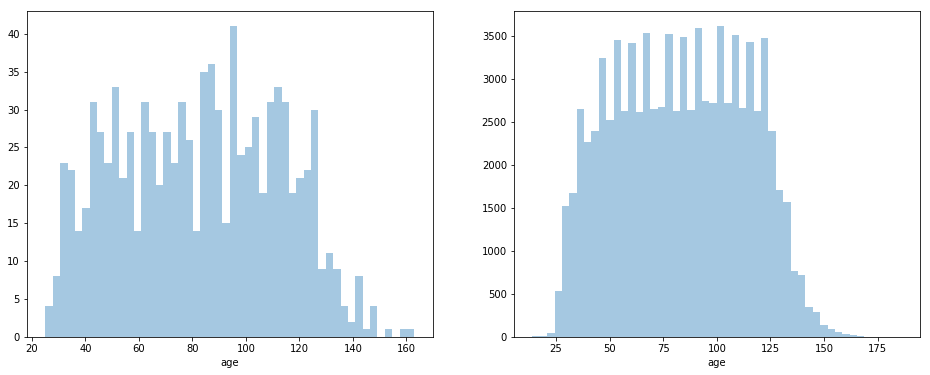

In [80]:
fig, ax=plt.subplots(1,2)
fig.set_size_inches(16,6)
sns.distplot(paid_user.age, hist=True, kde=False,bins=50, ax=ax[0])
sns.distplot(non_paid_user.age, hist=True, kde=False,bins=50, ax=ax[1])

In [81]:
train = data.drop(columns=['paid'])
test = data['paid']


In [82]:
train = pd.get_dummies(train)
train.shape

(90390, 172)

In [83]:
from sklearn.cross_validation import train_test_split

In [84]:
X_train, X_test, y_train, y_test = train_test_split(train, 
                                                    test, 
                                                    test_size = 0.2, 
                                                    random_state = 0)

print ("Training set has {} samples.".format(X_train.shape[0]))
print ("Testing set has {} samples.".format(X_test.shape[0]))

Training set has 72312 samples.
Testing set has 18078 samples.


In [85]:
from sklearn.linear_model import SGDClassifier
clf = SGDClassifier()
clf.fit(X_train,y_train)
clf.score(X_test,y_test)

c:\program files\python36\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


0.990098462219272

In [86]:
from sklearn.tree import DecisionTreeClassifier
clf=DecisionTreeClassifier()
clf.fit(X_train,y_train)
clf.score(X_test,y_test)

0.9753291293284655

In [87]:
from sklearn.ensemble import AdaBoostClassifier
clf=AdaBoostClassifier()
clf.fit(X_train,y_train)
clf.score(X_test,y_test)

0.990098462219272

In [88]:
from sklearn.neural_network import MLPClassifier 
clf=MLPClassifier()
clf.fit(X_train,y_train)
clf.score(X_test,y_test)

0.990098462219272